# Dynamics

* http://www.moorepants.info/blog/npendulum.html
* http://docs.sympy.org/dev/modules/physics/mechanics/index.html
* https://github.com/pydy/pydy
* https://dymaxionkim.github.io/beautiful-jekyll/1998-12-31-InvertedPendulum/


## PyDy
on Python 3.5

conda install -c pydy pydy
conda install -c pydy pydy-examples

## Exampe with PyDy
* This is an example of a simple one degree of freedom system: a mass under the influence of a spring, damper, gravity and an external force:

In [3]:
from sympy import symbols
import sympy.physics.mechanics as me

mass, stiffness, damping, gravity = symbols('m, k, c, g')

position, speed = me.dynamicsymbols('x v')
positiond = me.dynamicsymbols('x', 1)
force = me.dynamicsymbols('F')

ceiling = me.ReferenceFrame('N')

origin = me.Point('origin')
origin.set_vel(ceiling, 0)

center = origin.locatenew('center', position * ceiling.x)
center.set_vel(ceiling, speed * ceiling.x)

block = me.Particle('block', center, mass)

kinematic_equations = [speed - positiond]

force_magnitude = mass * gravity - stiffness * position - damping * speed + force
forces = [(center, force_magnitude * ceiling.x)]

particles = [block]

kane = me.KanesMethod(ceiling, q_ind=[position], u_ind=[speed],
                      kd_eqs=kinematic_equations)
kane.kanes_equations(forces, particles)

(Matrix([[-c*v(t) + g*m - k*x(t) + F(t)]]), Matrix([[-m*Derivative(v(t), t)]]))

In [5]:
from numpy import array, linspace, sin
from pydy.system import System

sys = System(kane,
             constants={mass: 1.0, stiffness: 1.0,
                        damping: 0.2, gravity: 9.8},
             specifieds={force: lambda x, t: sin(t)},
             initial_conditions={position: 0.1, speed: -1.0},
             times=linspace(0.0, 10.0, 1000))

In [6]:
y = sys.integrate()

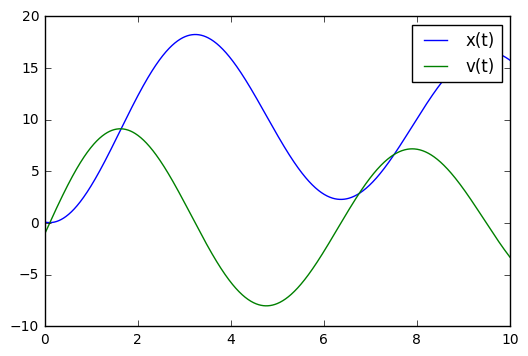

In [7]:
import matplotlib.pyplot as plt

plt.plot(sys.times, y)
plt.legend((str(position), str(speed)))
plt.show()

## Tutorial 
* https://github.com/pydy/pydy/blob/master/examples/tutorials/beginner.ipynb

In [8]:
from sympy import symbols
from sympy.physics.mechanics import *

In [9]:
dir()

['A',
 'B',
 'Body',
 'CoordinateSym',
 'Dyadic',
 'I',
 'In',
 'KanesMethod',
 'LagrangesMethod',
 'Lagrangian',
 'Linearizer',
 'Out',
 'P',
 'Particle',
 'Point',
 'ReferenceFrame',
 'RigidBody',
 'Symbol',
 'System',
 'Vector',
 '_',
 '_3',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'angular_momentum',
 'array',
 'block',
 'ceiling',
 'center',
 'cross',
 'curl',
 'damping',
 'divergence',
 'dot',
 'dynamicsymbols',
 'exit',
 'express',
 'find_dynamicsymbols',
 'force',
 'force_magnitude',
 'forces',
 'get_ipython',
 'get_motion_params',
 'gradient',
 'gravity',
 'inertia',
 'inertia_of_point_mass',
 'init_vprinting',
 'is_conservative',
 'is_solenoidal',
 'kane',
 'kinematic_equations',
 'kinetic_energy',
 'linear_momentum',
 'linspace',
 'm',
 'mass',
 'me',
 'mechanics_printing',

In [10]:
help(ReferenceFrame)

Help on class ReferenceFrame in module sympy.physics.vector.frame:

class ReferenceFrame(builtins.object)
 |  A reference frame in classical mechanics.
 |  
 |  ReferenceFrame is a class used to represent a reference frame in classical
 |  mechanics. It has a standard basis of three unit vectors in the frame's
 |  x, y, and z directions.
 |  
 |  It also can have a rotation relative to a parent frame; this rotation is
 |  defined by a direction cosine matrix relating this frame's basis vectors to
 |  the parent frame's basis vectors.  It can also have an angular velocity
 |  vector, defined in another frame.
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, ind)
 |      Returns basis vector for the provided index, if the index is a string.
 |      
 |      If the index is a number, returns the coordinate variable correspon-
 |      -ding to that index.
 |  
 |  __init__(self, name, indices=None, latexs=None, variables=None)
 |      ReferenceFrame initialization method.
 |      

In [11]:
N = ReferenceFrame('N')

In [12]:
dir(N)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ang_acc_dict',
 '_ang_vel_dict',
 '_cur',
 '_dcm_cache',
 '_dcm_dict',
 '_dict_list',
 '_dlist',
 '_var_dict',
 '_w_diff_dcm',
 '_x',
 '_y',
 '_z',
 'ang_acc_in',
 'ang_vel_in',
 'dcm',
 'indices',
 'latex_vecs',
 'name',
 'orient',
 'orientnew',
 'pretty_vecs',
 'set_ang_acc',
 'set_ang_vel',
 'str_vecs',
 'variable_map',
 'varlist',
 'x',
 'y',
 'z']

In [13]:
v = 1 * N.x + 2 * N.y + 3 * N.z

In [14]:
print(v)

N.x + 2*N.y + 3*N.z


In [15]:
2 * v

2*N.x + 4*N.y + 6*N.z

In [16]:
v / 3.0

0.333333333333333*N.x + 0.666666666666667*N.y + N.z

In [17]:
v + v

2*N.x + 4*N.y + 6*N.z

In [19]:
w = 5 * N.x + 7 * N.y


In [20]:
v - w

- 4*N.x - 5*N.y + 3*N.z

In [21]:
dir(v)

['__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__radd__',
 '__rand__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__ror__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_latex',
 '_pretty',
 '_sympyrepr',
 '_sympystr',
 'applyfunc',
 'args',
 'cross',
 'diff',
 'doit',
 'dot',
 'dt',
 'express',
 'magnitude',
 'normalize',
 'outer',
 'separate',
 'simp',
 'simplify',
 'subs',
 'to_matrix']

In [22]:
v.magnitude()

sqrt(14)

In [23]:
v.normalize()

sqrt(14)/14*N.x + sqrt(14)/7*N.y + 3*sqrt(14)/14*N.z

In [24]:
v.args

[(Matrix([
  [1],
  [2],
  [3]]), N)]

In [25]:
dot(v, w)

19

In [26]:
cross(v, w)

- 21*N.x + 15*N.y - 3*N.z

In [27]:
a1, a2, a3 = symbols('a1 a2 a3')
b1, b2, b3 = symbols('b1 b2 b3')

In [28]:
x = a1 * N.x + a2 * N.y + a3 * N.z
y = b1 * N.x + b2 * N.y + b3 * N.z

In [29]:
dot(x, y)

a1*b1 + a2*b2 + a3*b3

In [30]:
z = cross(x, y)
z

(a2*b3 - a3*b2)*N.x + (-a1*b3 + a3*b1)*N.y + (a1*b2 - a2*b1)*N.z

In [31]:
dot(v, x)

a1 + 2*a2 + 3*a3

In [32]:
z.diff(a1, N)

- b3*N.y + b2*N.z

In [33]:
A = ReferenceFrame('A')
alpha = symbols('alpha')
A.orient(N, 'Axis', [alpha, N.x])

In [34]:
A.dcm(N)

Matrix([
[1,           0,          0],
[0,  cos(alpha), sin(alpha)],
[0, -sin(alpha), cos(alpha)]])

In [35]:
v.express(A)

A.x + (3*sin(alpha) + 2*cos(alpha))*A.y + (-2*sin(alpha) + 3*cos(alpha))*A.z

In [36]:
z.express(A)


(a2*b3 - a3*b2)*A.x + ((a1*b2 - a2*b1)*sin(alpha) + (-a1*b3 + a3*b1)*cos(alpha))*A.y + ((a1*b2 - a2*b1)*cos(alpha) - (-a1*b3 + a3*b1)*sin(alpha))*A.z

In [37]:
beta, d = dynamicsymbols('beta d')
beta, d

(beta(t), d(t))

In [38]:
B = A.orientnew('B', 'Axis', (beta, A.y))

In [39]:
vec = d * B.z

In [40]:
B.ang_vel_in(N)

beta'*A.y

In [41]:
vecdot = vec.dt(N)
vecdot

d*beta'*B.x + d'*B.z

In [42]:
vecdot.express(N)

(d*cos(beta)*beta' + sin(beta)*d')*N.x + (d*sin(alpha)*sin(beta)*beta' - sin(alpha)*cos(beta)*d')*N.y + (-d*sin(beta)*cos(alpha)*beta' + cos(alpha)*cos(beta)*d')*N.z

In [43]:
theta = dynamicsymbols('theta')
thetad = dynamicsymbols('theta', 1)
theta, thetad

(theta(t), Derivative(theta(t), t))

## Double Pendulum Integration
* https://github.com/pydy/pydy/blob/master/examples/double_pendulum/scipy/double_pendulum_integration.py

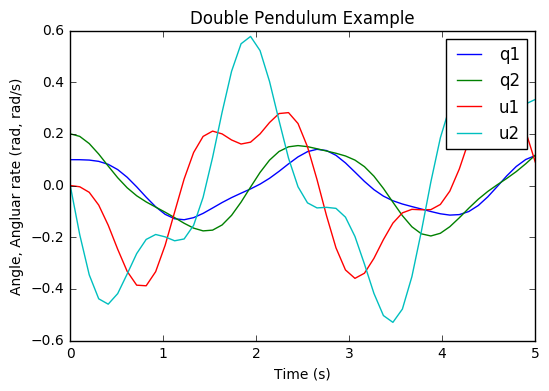

In [44]:
#!/usr/bin/env python

# This is an example of integrating the equations of motion for a double
# pendulum which were generated with sympy.physics.mechanics. We make use of
# SciPy/NumPy for the integration routines and Matplotlib for plotting.
#
# Steps taken:
# 1. Turned on mechanics_printing() in sympy.physics.mechanics for proper
# output for copying the equations to this file.
# 2. Import zeros, sin, cos, linspace from NumPy, odeint from SciPy and pyplot
# from Matplotlib.
# 3. Write a function definition that returns the right hand side of the
# first order form of the equations of motion. rhd(y, t, *parameters)
# 4. Called odeint with rhs, y0, t and the parameters.
# 5. Plotted the results.

from numpy import sin, cos, linspace, zeros
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Integration ##

def rhs(y, t, l, m, g):
    """Returns the derivatives of the states at the given time for the given
    set of parameters.

    Parameters
    ----------
    y : array_like, shape(n,)
        An array of the current states.
    t : float
        The current time.
    l : float
        Pendulum length.
    m : float
        Pendulum mass.
    g : float
        Acceleration due to gravity.

    Returns
    -------
    dydt : array_like, shape(n,)
        An array of the current derivatives of the states.

    Notes
    -----
    The units and order of the states, time and parameters should be
    consistent.

    """
    # Unpack the states so you can use the variable names in the
    # sympy.physics.mechanics equations
    q1 = y[0]
    q2 = y[1]
    u1 = y[2]
    u2 = y[3]
    # or you can make use of python's tuple unpacking for a one liner
    # q1, q2, u1, u2 = y

    # Initialize a vector for the derivatives.
    dydt = zeros((len(y)))

    # Compute the derivatives, these are pasted in from the
    # sympy.physics.mechanics results.
    dydt[0] = u1
    dydt[1] = u2
    dydt[2] = (-g*sin(q1)*sin(q2)**2 + 2*g*sin(q1) -
        g*sin(q2)*cos(q1)*cos(q2) + 2*l*u1**2*sin(q1)*cos(q1)*cos(q2)**2 -
        l*u1**2*sin(q1)*cos(q1) - 2*l*u1**2*sin(q2)*cos(q1)**2*cos(q2) +
        l*u1**2*sin(q2)*cos(q2) + l*u2**2*sin(q1)*cos(q2) -
        l*u2**2*sin(q2)*cos(q1))/(l*(sin(q1)**2*sin(q2)**2 +
        2*sin(q1)*sin(q2)*cos(q1)*cos(q2) + cos(q1)**2*cos(q2)**2 - 2))
    dydt[3] = (-sin(q1)*sin(q2)/2 - cos(q1)*cos(q2)/2)*(2*g*l*m*sin(q1) -
        l**2*m*(-sin(q1)*cos(q2) +
        sin(q2)*cos(q1))*u2**2)/(l**2*m*(sin(q1)*sin(q2)/2 +
        cos(q1)*cos(q2)/2)*(sin(q1)*sin(q2) + cos(q1)*cos(q2)) -
        l**2*m) + (g*l*m*sin(q2) - l**2*m*(sin(q1)*cos(q2) -
        sin(q2)*cos(q1))*u1**2)/(l**2*m*(sin(q1)*sin(q2)/2 +
        cos(q1)*cos(q2)/2)*(sin(q1)*sin(q2) + cos(q1)*cos(q2))
        - l**2*m)

    # Return the derivatives.
    return dydt

# Specify the length, mass and acceleration due to gravity.
parameters = (1, 1, 9.8)
# Specify initial conditions for the states.
y0 = [.1, .2, 0, 0]
# Create a time vector.
t = linspace(0, 5)
# Integrate the equations of motion.
y = odeint(rhs, y0, t, parameters)


## Plotting ##

# Create an empty figure.
fig = plt.figure()

# Add a single axes to the figure.
ax = fig.add_subplot(1, 1, 1)

# Plot the states versus time.
ax.plot(t, y)

# Add a title, axes labels and a legend.
ax.set_title('Double Pendulum Example')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle, Angluar rate (rad, rad/s)')
ax.legend(['q1', 'q2', 'u1', 'u2'])

# Display the figure.
plt.show()


## Simple Pendulum Example
* https://github.com/pydy/pydy/tree/master/examples/simple_pendulum


![Pendulum](https://rawgithub.com/pydy/pydy/master/examples/simple_pendulum/pendulum.svg)



In [45]:
# This code requires sympy 1.0 to run

from sympy import *
from sympy.physics.mechanics import LagrangesMethod, Lagrangian
from sympy.physics.mechanics import ReferenceFrame, Particle, Point
from sympy.physics.mechanics import dynamicsymbols

# System state variables
theta = dynamicsymbols('theta')
thetad = dynamicsymbols('theta', 1)

# Other system variables
m, l, g = symbols('m l g')

# Set up the reference frames
# Reference frame A set up in the plane perpendicular to the page containing
# segment OP
N = ReferenceFrame('N')
A = N.orientnew('A', 'Axis', [theta, N.z])

# Set up the points and particles
O = Point('O')
P = O.locatenew('P', l * A.x)

Pa = Particle('Pa', P, m)

# Set up velocities
A.set_ang_vel(N, thetad * N.z)
O.set_vel(N, 0)
P.v2pt_theory(O, N, A)

# Set up the lagrangian
L = Lagrangian(N, Pa)

# Create the list of forces acting on the system
fl = [(P, g * m * N.x)]

# Create the equations of motion using lagranges method
l = LagrangesMethod(L, [theta], forcelist=fl, frame=N)

pprint(l.form_lagranges_equations())


⎡                         2      ⎤
⎢                   2    d       ⎥
⎢g⋅l⋅m⋅sin(θ(t)) + l ⋅m⋅───(θ(t))⎥
⎢                         2      ⎥
⎣                       dt       ⎦
